Import all necessary python packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

# Lab 2

Open data

In [7]:
masses = np.array([100, 150, 200, 250, 300]) / 1e3
periods = np.array([6.3, 7.68, 8.85, 9.97, 10.95]) / 10
trials = np.array([7.98, 7.95, 7.95, 7.97, 7.92])
dP = np.ones(len(masses)) * np.std(trials) /10
data = np.array([masses, periods, dP])

Get variables from the data

In [8]:
xvar = data[0]
yvar = data[1]   
dyvar = data[2] 
print("Length of the 1st vector:",len(xvar))

Length of the 1st vector: 5


Plot data

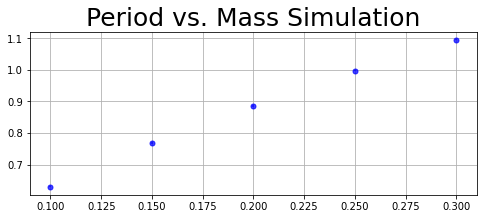

In [11]:
plt.figure(figsize=(8,3))
plt.errorbar(xvar,yvar,yerr=dyvar,fmt='o',ms=5,color='blue',alpha=0.75)
plt.grid(True) 
plt.title('Period vs. Mass Simulation',fontsize=25) #Plot title
plt.show()

$T^2 = \frac{4\pi^2}{k}M$

Function that takes in data $x$ and $y$ and returns the $\chi^2$ minimized value of parameters $m$ and $b$ when fitting the data to a linear line

In [12]:
def OLSfit(x, y, dy=None):
    if dy is None:
        #if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy)**2) - (np.sum(x / dy**2))**2
    m = (np.sum(1 / dy**2) * np.sum(x * y / dy**2) - 
         np.sum(x / dy**2) * np.sum(y / dy**2)) / denom
    b = (np.sum(x**2 / dy**2) * np.sum(y / dy**2) - 
         np.sum(x / dy**2) * np.sum(x * y / dy**2)) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x / dy**2) / denom)
    return m, dm, b, db

**Analytic Formula (Linear Least Squares)**

In [24]:
mopt, dmopt, bopt, dbopt = OLSfit(xvar,yvar**2,2*yvar*dyvar)

**Non Linear Least Squares**

In [25]:
def line(x, m, b):
    return m*x+b
popt, pcov = curve_fit(line, xvar, yvar**2, sigma=2*yvar*dyvar, absolute_sigma=True)

Compute $k$ uisng linear regression analytic formula and using non-linear least squares `curve_fit` function

In [26]:
k1 = 4*np.pi**2 / mopt
k2 = 4*np.pi**2 / popt[0]
print(k1)
print(k2)

9.884965483854653
9.884965485040885


Compute error on $k$

In [27]:
dk1 = 4*np.pi**2 / mopt**2 *dmopt
dk2 = 4*np.pi**2 / popt[0]**2 * np.sqrt(pcov[0][0])
print(dk1)
print(dk2)

0.05474495632568516
0.05474495623818982


# Lab 2

Open data

In [101]:
data = np.genfromtxt(datafile,delimiter=',',dtype=float)
xvar = data[:,0]
yvar = data[:,1]   
dyvar = data[:,2] 

Get optimal parameters

In [102]:
mopt, dmopt, bopt, dbopt = bestfit = OLSfit(xvar,yvar,dyvar)

In [103]:
k = 9.81/mopt
k

11.934306569343066

In [104]:
dk = 9.81/mopt**2 * dmopt
dk

0.04591191125770598

In [9]:
# Create an array of values starting at 1st xvar = 1750, going up to 2100, with steps of 10 (for the climate data)
#Change the following values to cover the range of your x variables
xForLine = np.arange(1750.,2150.,10.) 
# Calculate the value of the best fit line to be printed on plots: y = slope * x + intercept 
yForLine = slope*xForLine + intercept

In [10]:
#Calculate the residuals for each year and the overall value of Chi-square
residual=yvar-(slope*xvar+intercept)
# Calculate the Chi-sq; number of degrees of freedom, ndof=no. entries - no. parameters -1
ndof=len(xvar)-2-1
ru=residual/dyvar
chisq=np.sum(np.power(ru,2))/ndof
print("Chisq", str.format('{0:.4f}',chisq))#Print 4 significant figures
#

Chisq 8.2520


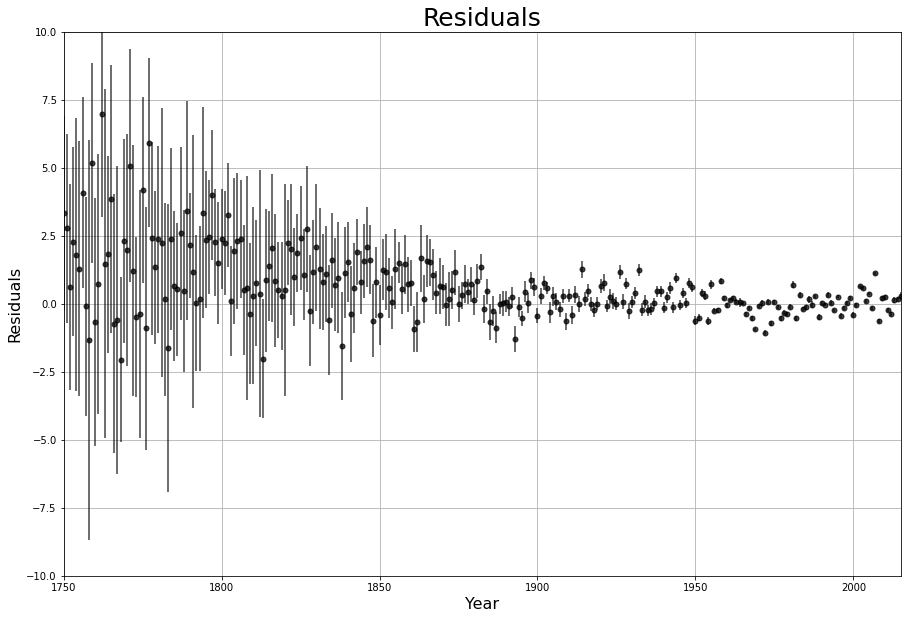

In [11]:
#Plot the residuals
plt.errorbar(xvar,residual,yerr=dyvar,fmt='o',ms=5,color='black',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
# The next 2 lines set the range for plotting the Y and x variables:
plt.ylim(ymin_residuals,ymax_residuals) # This sets the range of the y-axis
plt.xlim(xmin,xmax) # This sets the range of the x-axis
#
plt.grid(True) # This toggles whether gridlines are displayed
# Set the labels and title for your residuals plot
plt.xlabel(xlabel,fontsize=16)
plt.ylabel('Residuals',fontsize=16)
plt.title('Residuals',fontsize=25) 
# Add the value of Chi-sq to the plot; locate this relative to the x and y axes.
#f in front of the string'....' allows the variable in {chsq} to be printed
# This allows selecting the no. sig. digits and rounding to be printed on plot
#chi = "Chi-sq ={:.3f}".format(round(chsq, 3))
#chi = "Chi-sq ={:.2f}".format(chsq)#rounds to 2 sig. digits
#plt.annotate(chi ,xy=(1900,8),  xytext=(1900,8),color="blue",fontsize=24)
plt.savefig(plot2,bbox_inches='tight',dpi=300)# Add the line

Bestfit:
     slope            m= 0.014593
     slope error     dm= 0.000351
     intercept        b= -25.835436
     intercept error db= 0.015636
Chisq 8.2520


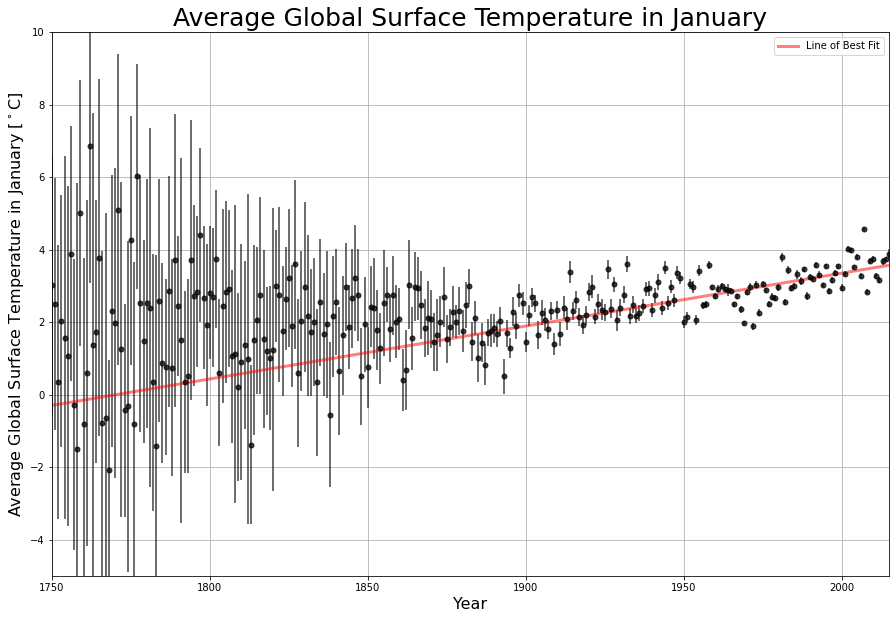

In [12]:
#Plot the best fit line with the data
plt.errorbar(xvar,yvar,yerr=dyvar,fmt='o',ms=5,color='black',alpha=0.75)
plt.gcf().set_size_inches(15,10) # This sets the size of the plot
plt.ylim(ymin,ymax) # This sets the range of the y-axis
plt.xlim(xmin,xmax) # This sets the range of the x-axis
plt.grid(True) # This toggles whether gridlines are displayed
plt.xlabel(xlabel,fontsize=16)
plt.ylabel(ylabel,fontsize=16)
plt.title(title,fontsize=25)

# Add the line to the plot
plt.plot(xForLine,yForLine,lw=3,color='red',alpha=0.5,label='Line of Best Fit')
# Add the value of Chi-sq to the plot; locate this relative to the x and y axes.
#chi = "Chi-sq ={:.3f}".format(round(chsq, 3))
#plt.annotate(chi ,xy=(1900,8),  xytext=(1900,8),color="blue",fontsize=20)
# Add the values of the slope and intercepts (and their errors) to the plot
#sp="Slope m={:.5f}".format(round(bestfit[0],5)),"dm= {:.5f}".format(round(bestfit[1],5))
#plt.annotate(sp ,xy=(1900,7),  xytext=(1900,7),color="blue",fontsize=20)
#ic="Intercept b={:.3f}".format(round(bestfit[2],3)),"db= {:.3f}".format(round(bestfit[3],3))
#plt.annotate(ic ,xy=(1900,6),  xytext=(1900,6),color="blue",fontsize=20)
# Add a legend
plt.legend()
plt.savefig(plot3,bbox_inches='tight',dpi=300)
print("Bestfit:")
print("     slope            m=",str.format('{0:.6f}',bestfit[0]))
print("     slope error     dm=",str.format('{0:.6f}',bestfit[1]))
print("     intercept        b=",str.format('{0:.6f}',bestfit[2]))
print("     intercept error db=",str.format('{0:.6f}',bestfit[3]))
print("Chisq", str.format('{0:.4f}',chisq))#Print 4 significant figures


# Today

In [60]:
xvar = np.arange(0,10)
yvar = 5*xvar+9 + 3*np.random.randn(len(xvar))
dyvar = np.random.randn(len(xvar))

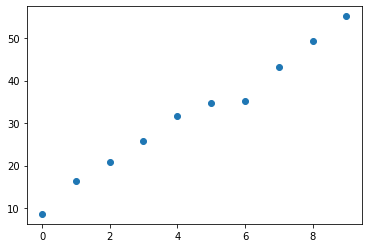

In [61]:
plt.scatter(xvar, yvar)

# Method 1

From lab 2. Uses OLS fit

In [75]:
def OLSfit(x, y, dy=None):
    if dy is None:
        #if no error bars, weight every point the same
        dy = np.ones(x.size)
    denom = np.sum(1 / dy**2) * np.sum((x / dy)**2) - (np.sum(x / dy**2))**2
    m = (np.sum(1 / dy**2) * np.sum(x * y / dy**2) - 
         np.sum(x / dy**2) * np.sum(y / dy**2)) / denom
    b = (np.sum(x**2 / dy**2) * np.sum(y / dy**2) - 
         np.sum(x / dy**2) * np.sum(x * y / dy**2)) / denom
    dm = np.sqrt(np.sum(1 / dy**2) / denom)
    db = np.sqrt(np.sum(x**2 / dy**2) / denom)
    return m, dm, b, db

Get parameters (`opt` means "optimal parameters")

In [63]:
mopt, dmopt, bopt, dbopt = OLSfit(xvar,yvar,dyvar)

Look at them

In [64]:
mopt

4.884922018352474

In [65]:
dmopt

0.035686718167345574

In [66]:
dbopt

0.08847827489990213

# Method 2

From today's lab using scipy's `curve_fit` function

In [67]:
def line(x, m, b):
    return m*x+b
popt, pcov = curve_fit(line, xvar, yvar, sigma=dyvar, absolute_sigma=True)

Get parameters

In [68]:
mopt, bopt = popt
dmopt = np.sqrt(pcov[0][0])
dbopt = np.sqrt(pcov[1][1])

Print them out

In [69]:
mopt

4.884922014045534

In [70]:
dmopt

0.03568671856737505

In [71]:
dbopt

0.24579131944109509